# Introduction to Data Science
## Homework 
### Kateryna Ruskykh
#### (part of a team with Dmytro Babchuk, Iaroslav Plutenko and Ihor Hrysha)

## 1. Loading the data
The goal of the assignment is to make propositions how to modify the MSc Data Science at UCU by adding/removing courses. 
To meet the goal, we (our team jointly) first parsed indeed.com (we used a modified code provided in the course folders by O.Romanenko). In my work I use a joint data that is a result of Data Science job postings in London, Amsterdam, Dublin, Canada and Australia. The total size of my data is 4762 job postings.
Below I loaded the data and showed the first 5 rows of it.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
DF_ALL = pd.read_csv("Jobs_AU_CA_LON_AMS_DUB.csv")
DF_ALL = DF_ALL.iloc[:, 1:]
print(DF_ALL.head())

                                     Job_Description            Job_ID  \
0  [Perth WAAs part of the continued growth and i...  511c56821a441fdc   
1  [Melbourne VICPermanent$180,000 - $250,000 a y...  74e3caaf3a793916   
2  [Sydney NSW 2000$200,000 a yearData Scientist ...  1b59fec794bc4437   
3  [Sydney NSW 2000$190,000 a yearOur client is a...  c2a5e878f06fbf93   
4  [Sydney NSWContract$300 - $1,000 a dayData Sci...  65c450de82bad1e1   

                                           Job_Title       Location    Salary  
0  Environmental Scientist, Graduate to Senior (M...       Perth WA  160000.0  
1                         Lead Data Scientist - Tech  Melbourne VIC  160000.0  
2  Data Scientist / Lucrative Horse Racing Predic...     Sydney NSW  160000.0  
3          Lead Data Scientist - up to $250k package     Sydney NSW  160000.0  
4                                     Data Scientist     Sydney NSW  160000.0  


## 2. What skills are needed?
Now let's explore what skills the employers need from a data scientiest. To do this let's search in the Job_Description of each job posting the key words/skills of a data scienties grouped in way showed below (the key skills and grouping of our group members can vary a lot):

In [8]:
all_skills = {
    'Stats': ['exploratory','stats', 'statistics', 'statistical', 'inferencial', 'inference', \
              'descriptive statistics', 'sampling', 'hypothesis testing'],
    'StatsModels': ['regression', 'least squares','time series', 'time-series', 'prediction modelling', \
                    'forecast', 'linear models'],
    'Exploratory Tools': ['excel', 'sas', 'spss', ' r ', 'R,', ' R.' ],
    'Econometrics': ['econometrics','econometric '],
    'Analysis': ['business analysis', 'data analysis'],
    'Python' : ['python','numpy', 'pandas', 'scikit-learn'],
    'Scala': ['scala'],
    'Math' : ['math', 'mathematics'],    
    'Artificial Intelligence': ['artificial intelligence',' AI ', ' AI, ', ' AI. ', 'Neural Networks'],
    'Deep learning': ['deep learning'],
    'Reinforcement learning': ['reinforcement learning'],
    'Algorithms and models': ['regression', 'random forest', 'decision tree', 'k-means', 'XGBoost', 'SVM', 'KNN', 'Naive Bayes', 'gradient boosting', 'SVD'],
    'Business Skills': ['risk management', 'problem solving'],
    'Communication Skills': ['communication', 'communicate', 'presentation'],
    'Machine Learning': ['machine learning'],
    'Data visualization': ['visualization', 'ggplot', 'ggplot2', 'matplotlib', 'tableau', 'dataviz'],
    'Matlab': ['matlab'],
    'SQL': ['sql'],
    'Big Data': ['hadoop','spark', 'hive'],
    'Cloud': ['cloud', 'AWS', 'Amazon Web Services'],
    'NLP': ['Natural Language Processing', ' NLP ', ' NLP, ', ' NLP. '],
    'Computer vision': ['computer vision', 'convolutional'],
    'Leadership': ['decisiveness', 'manage a team', 'team management','lead a team', 'leadership','dependability', 'conflict-resolution', 'constructive criticism', 'delegating tasks', 'empathy', 'empowerment', 'integrity', 'mentoring', 'motivating', 'patience', 'relationship management', 'task delegation', 'team building', 'teamwork'],
    'Planning and strategy': ['adaptability', 'brainstorming', 'business development', 'conflict resolution', 'critical thinking', 'decision-making', 'flexibility', 'logical thinking', 'problem-solving', 'problem solving', 'strategic thinking', 'business sense', 'acumen', 'curiosity'],
    'Organizational': ['deadline management', 'event coordination', 'filing', 'goal setting', 'office management', 'project management', 'record keeping', 'scheduling', 'time management', 'risk management', 'prioritisation']
}

## 2 Continued: <br>
Below I loaded and demonstrated the datatable that contains skills for each job posing in our DF_ALL (1 is a skill is present, 0 otherwise). Note, only aggregated groups are presented (keys of the above dictionary).


In [11]:
DF_Skills = pd.read_csv("DATASkills.csv")
DF_Skills = DF_Skills.iloc[:, 1:]
print(DF_Skills.head())

                                     Job_Description            Job_ID  \
0  [Perth WAAs part of the continued growth and i...  511c56821a441fdc   
1  [Melbourne VICPermanent$180,000 - $250,000 a y...  74e3caaf3a793916   
2  [Sydney NSW 2000$200,000 a yearData Scientist ...  1b59fec794bc4437   
3  [Sydney NSW 2000$190,000 a yearOur client is a...  c2a5e878f06fbf93   
4  [Sydney NSWContract$300 - $1,000 a dayData Sci...  65c450de82bad1e1   

                                           Job_Title       Location    Salary  \
0  Environmental Scientist, Graduate to Senior (M...       Perth WA  160000.0   
1                         Lead Data Scientist - Tech  Melbourne VIC  160000.0   
2  Data Scientist / Lucrative Horse Racing Predic...     Sydney NSW  160000.0   
3          Lead Data Scientist - up to $250k package     Sydney NSW  160000.0   
4                                     Data Scientist     Sydney NSW  160000.0   

   Stats  StatsModels  Exploratory_Tools  Econometrics  Analysis  ..

## 2 Continued: <br>
Now, let's visualize the count of what skills are most wanted by the employers. See, the graph below and discussion of the findings bellow.

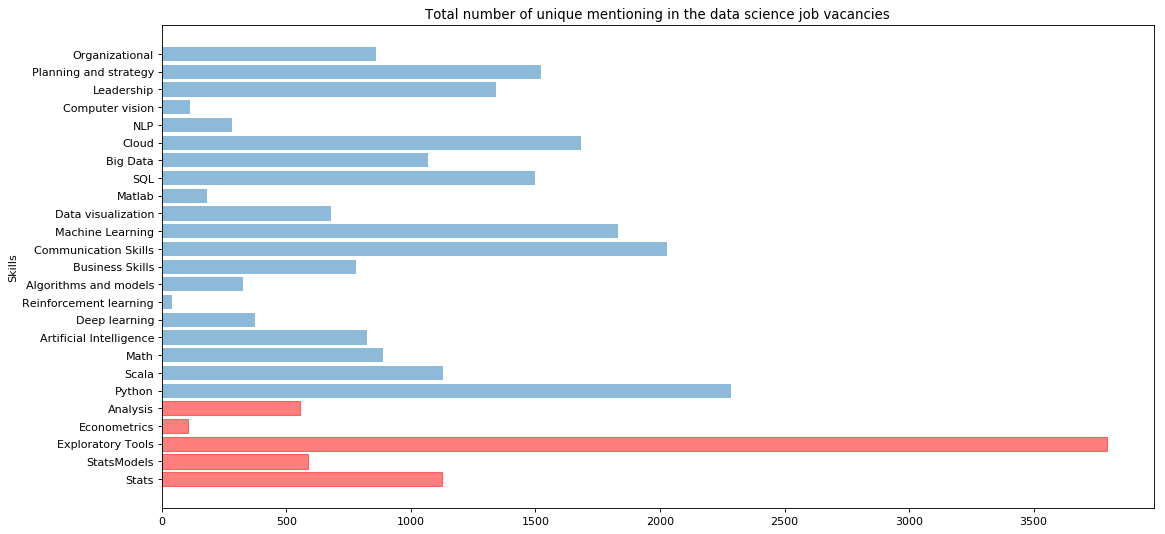

In [17]:
Skills = DF_Skills.iloc[:, 5:]
skills_counts = Skills.sum(axis = 0).to_numpy()
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
y = skills_counts
x = [k for k in all_skills.keys()]
barlist = plt.barh(x, y, align='center', alpha=0.5)
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('r')
barlist[3].set_color('r')
barlist[4].set_color('r')
plt.ylabel('Skills')
plt.title('Total number of unique mentioning in the data science job vacancies')

plt.show()

## 2. Continues (Discusion)

The interesting finding of the graph is the soft skills are almost always at the top among the skills employers want from a data scientist. See the organizational skills, planing and strategy, leadership, communication and business skills. They have very high counts compared to NLP, Deep Learning or AI.
A high exploratory tools count is explained by the high popularity of Excel and R that are hidden their. The reasons I joined them togather and why some of the bars are red I'll tell in the following part.

## 3. Exploratory skills

Our group divided skills that a data scienties is supposed to have into groups according to the following framework: Obtain, Scrub, Explore, Model and Interpret. My part is skills to explore the data (plus the part of the Model group that deal with statistical modelling).
Below I showed the exploratory skills and their grouping I had used in my work. 
I added 'Excel' to my exploratory group although it is broadly used not only as an exploratory tool. But let's assume it is.



In [18]:
explore_skills_keys = {
    
    'Stats': ['exploratory','stats', 'statistics', 'statistical', 'inferencial', 'inference', \
              'descriptive statistics', 'sampling', 'hypothesis testing'],
    'StatsModels': ['regression', 'least squares','time series', 'time-series', 'prediction modelling', \
                    'forecast', 'linear models'],
    'Exploratory Tools': ['excel', 'sas', 'spss', ' r ', 'R,', ' R.' ],
    'Econometrics': ['econometrics','econometric '],
    'Analysis': ['business analysis', 'data analysis']
    
    
}

## 3 Continued.
Bellow I show the histograms of the counts of exploratory adn statistical skills I researched. My conclusion is that pure 'descriptive exploratory skills' like data exploration, basic statiscal descriptive analysis is not often mentioned in the data science job postings. The reason is that employers assume that a data scientist has this knowledge by default and require more advanced skills (as well as soft skills mentioned above). So, we see higher counts of statistical and related skills (as well as statistics-related modelling). We also see that R is quite popular programming language (here we assume that it is primarily used for statistical analysis and modelling). And excel also stands out as a quite good and wide-spread tool for basic (as well as more advanced) analysis. 

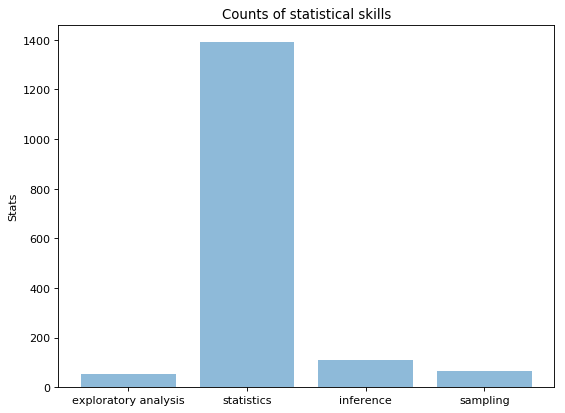

In [19]:
stats_list = ['exploratory analysis', 'statistics', 'inference', 'sampling']
stats_list_num = [53, 41+646+701+3, 75+36, 65]
statsmod_list = ['regression', 'time series', 'predition_modelling']
statsmod_num = [231+8, 79+46, 308]
statstools_list = ['excel', 'sass', 'spss', 'r']
statstools_num = [1763, 203, 50, 2956+71+284]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

barlist = plt.bar(stats_list, stats_list_num, align='center', alpha=0.5)

plt.ylabel('Stats')
plt.title('Counts of statistical skills')

plt.show()

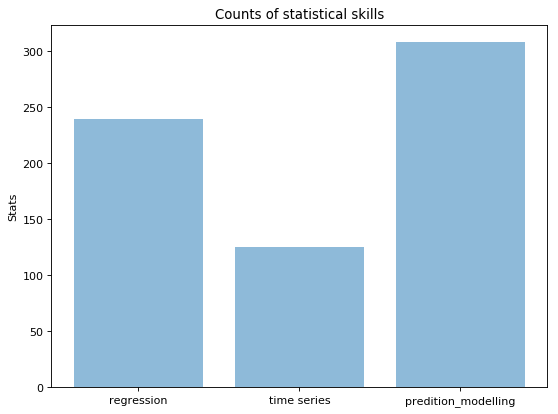

In [20]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

barlist = plt.bar(statsmod_list, statsmod_num, align='center', alpha=0.5)

plt.ylabel('Stats')
plt.title('Counts of statistical skills')

plt.show()

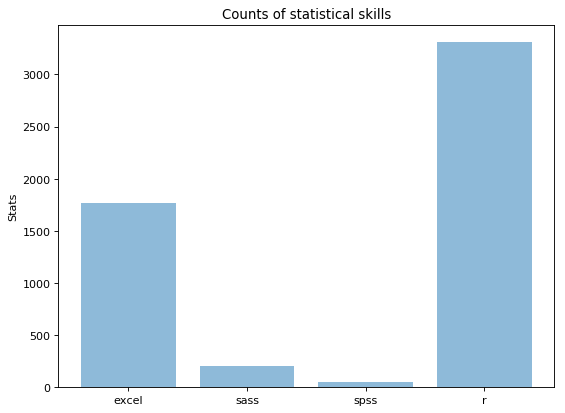

In [21]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

barlist = plt.bar(statstools_list, statstools_num, align='center', alpha=0.5)

plt.ylabel('Stats')
plt.title('Counts of statistical skills')

plt.show()

### 4. The Exploratory skills in the Master Program subjects

Now let's move on and find the courses in the western university master programs that correspond to the exploratory skills I visualized and discussion above.

We scrapped (with an external help of a friend-programmer) and parsed (by ourselves) the website https://www.mastersportal.com/, Data Science and Bid Data section. The master programs listed (their variance is very high, so it's not a pure data science education) contains a program structure page, for instance: https://www.mastersportal.com/studies/152893/engineering-science.html#content:contents. 

Thus, we have a json file with couses of 666 (nice number, yep :)) master programs. My task is to find the courses in the file that correspond to the exploratory skills (in my representation).

In [24]:
#Here I read my json data into a dict with a university as a key and program structure as values (represented by a list)
MPs = {}
with open('ProgramStructure_2.json') as json_file:
    data = json.load(json_file)
    for p in data:
        MPs[(p['organisation'], p['title'])] = p['programStructure']

print(len(MPs))

666


In [25]:
#here is a bit edited list of the skills I use
skills_edited = ['exploratory', 'statistics', 'statistical', 'inference', 'inferecial', 'descriptive statistics', \
                'hypothesis testing', 'regression', 'linear models', 'time series', 'time-series', 'prediction modeling', \
                'forecast', 'excel', 'spreadsheet', 'sas', 'spss', ' R ', 'econometrics', 'econometric', 'business analysis', \
                'data analysis']

In [29]:
#the code below search the skills from my skills_edited list in the dict with master programs and returns another\\
#dict that has a key word (key skill) and all courses in a list that contain this skill

def find_skills_inMPs(subject,search_words):       
    # loop search words
    result = []
    for search_word in search_words:
        #print(search_word)
        if search_word.lower() in subject.lower():
            result_tup = (search_word, subject)
            result.append(result_tup)
    if len(result) > 0:
        return result
    else:
        return 0


subjects_all = {}
subjects = []

for k,v in MPs.items():
    for s in v:
        a = find_skills_inMPs(s, skills_edited)
        #print(a)
        if a != 0:
            for r in a:
                if r[0] in subjects_all.keys():
                    subjects_all[r[0]].append(r[1])
                else:
                    subjects_all[r[0]] = [r[1]]
                

### 4. Continued
Now i have a lot of subjects to choose from. But the data is not clean. The subjects can repeat each other (in case we have the same subject name in different universities) or can be very similar. Moreover, there can be very specific subjects like "data analysis in archeology". That's not what we really need. So, let's use some data analysis tools and coding to make our results cleaner.
The strategy is the following: within each group, let's show only those courses that are most common (most repeated and have more similar courses (similarity threshold I use is 0.75)). 


In [32]:
#Here we see the number of subjects / courses per each key word. We definitely need only a few
for k,v in subjects_all.items():
    print(k, len(v))

statistical 158
data analysis 128
statistics 192
econometrics 24
econometric 27
time series 18
regression 27
exploratory 7
forecast 16
business analysis 3
spreadsheet 2
inference 24
sas 12
linear models 6
 R  6
time-series 3
excel 1
descriptive statistics 2


In [33]:
#Here get_cosine_sim return similarity matrix between all strings (in our case subjects) it receives.

def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [35]:
# show_most_common показує курси і їх кількість, які дуже схожі між собою (схожість передається в threshold). 
def show_most_common(subject_list, thres, top=10):
    similarity = get_cosine_sim(*subject_list)
    ind = np.where(similarity >= thres)[0].tolist()
    ind_count = {subject_list[x]:ind.count(x) for x in ind}
    tuple_count = [(k, v) for k, v in ind_count.items()]
    tsorted = sorted(tuple_count, key=lambda x: x[1], reverse=True)
    print("The top courses with similarity above the " + str(thres))
    if top > len(tsorted):
        top_sub = tsorted
    else:
        top_sub = tsorted[:top]
    return top_sub


# в результаті ми отримуємо список найбільш частих крусів, але серед них є повтори, або схожі. Тому ця функція робить операцію навпаки -
#(по відношення до попередньої) вона повертає тільки 1 з найбільш схожих результатів курсів.
def clean_sim_result(result_tuple):
    sub_res = [x[0] for x in result_tuple]
    sim_matrix = get_cosine_sim(*sub_res)
    index = np.where(sim_matrix>0.7)
    
    if len(index[0]) > 0:
        cor = list(zip(index[0], index[1]))
        exclude = []
        for c in cor:
            if (c[1] != c[0]) & (c[1] not in exclude) &(c[0] not in exclude):
                exclude.append(c[1])
    
        #print(exclude)
        new_result = [x for i,x in enumerate(result_tuple) if i not in exclude]
    else:
        new_result = result_tuple
    return new_result

In [49]:
def get_results(all_dict):
    result_dict = {}
    top_sub_list = []
    for k,v in all_dict.items():
        sub_list = [x.lower() for x in all_dict[k]]
        tuple_top = show_most_common(sub_list, 0.75, 20)
        tuple_top_clean = clean_sim_result(tuple_top)
        print("----------------" + str(k) + "-------------------" )
        print("-------------------------------------------------")
        for t in tuple_top_clean:
            if len(t[0]) < 60:
                print(t)
        print("-------------------------------------------------")
    

In [50]:
get_results(subjects_all)

The top courses with similarity above the 0.75
----------------statistical-------------------
-------------------------------------------------
('statistical data analysis', 16)
('statistical methods', 13)
('statistical learning', 9)
('statistical analysis and modelling', 9)
('statistical inference', 9)
('statistical programming', 9)
('statistical methods for data science', 9)
('statistical learning and data mining', 8)
-------------------------------------------------
The top courses with similarity above the 0.75
----------------data analysis-------------------
-------------------------------------------------
('data analysis', 53)
-------------------------------------------------
The top courses with similarity above the 0.75
----------------statistics-------------------
-------------------------------------------------
('applied managerial statistics', 25)
('modern applied statistics', 24)
('statistics for data analytics', 23)
('probability and statistics for data science', 22)
('s

# Discussion of results and Conclusion
The results show key words and a corresponding course with a frequency of its apperance (including similarity measure) in Master Programs related to Data Science. I printed out a specific results with count 1 to show that the courses that corresponds to some rearly-appeared key words (statistic words) exist in our data. However, let's consider only most popular/common courses in the list (with frequency above 10): <br>
<br>
statistical data analysis <br>
statistical methods <br>
data analysis <br>
applied managerial statistics <br>
modern applied statistics <br>
statistica for data analytics <br>
probability and statistics for data science <br>
data analysis and statistics <br>
time series <br>
<br>
We see that the courses are similar in meaning despite being different in wordings (due to my algorithm that excluded very similar courses). The list with more or less different courses are the following: <br>
<br>
data analysis and statistics<br>
time series<br>
<br>
However, we have statistics and time-series included into our MSc Data Science at UCU, so I am not able to suggest a new courses for UCU withing my exploratory + statistical models domain
<br>
To improve my analysis I would suggest to compare the content / practical aspect of the UCU exploratory + statical models courses and the number of credits with other university programs, and this would potentially generate more recommendations about the course design.
